In [1]:
from ImagingReso.resonance import Resonance
import pandas as pd
import numpy as np
import ImagingReso._utilities as ir_util
import pprint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
# Load CG-1D beam shape
path_to_beam_shape = '/Users/y9z/Dropbox (ORNL)/Postdoc_Research/neutron_beam_shape/CG1D/beam_shape_cg1d.txt'
df = pd.read_csv(path_to_beam_shape, sep='\t', skiprows=0)
df.columns = ['wavelength_A', 'flux']

In [3]:
# Get rid of abnormal data
df.drop(df[df.wavelength_A < 0].index, inplace=True)
df.drop(df[df.flux <= 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)
# Convert lambda to energy
energy_list = ir_util.angstroms_to_ev(df['wavelength_A'])
df.insert(1, 'energy_eV', energy_list)
df

,wavelength_A,energy_eV,flux
0,0.812655,0.123843,1.776169e+04
1,1.028404,0.077332,1.201199e+05
2,1.244153,0.052837,2.919421e+05
3,1.459902,0.038374,5.860009e+05
4,1.675651,0.029128,1.030660e+06
5,1.891400,0.022862,1.509066e+06
6,2.107149,0.018420,1.863847e+06
7,2.322899,0.015157,1.989239e+06
8,2.538648,0.012691,2.231573e+06
9,2.754397,0.010780,2.254231e+06


In [4]:
# Preview the first and last energy
energy_list = list(df['energy_eV'])
_energy_min = energy_list[-1]
_energy_max = energy_list[0]
_energy_step = (_energy_max - _energy_min)/200
print("_E_min = {} (eV)\n_E_max = {} (eV)\n_E_step = {} (eV)\n".format(_energy_min, _energy_max, _energy_step))

_E_min = 0.00029053560401083275 (eV)
_E_max = 0.12384313918225247 (eV)
_E_step = 0.0006177630178912082 (eV)



In [5]:
_energy_max.round(5)

0.12384000000000001

In [6]:
_energy_min.round(5)

0.00029

In [7]:
# Determine e_max and e_min to pass
energy_min = 0.00025
energy_max = 0.12525
energy_step = (energy_max - energy_min)/200
print("E_min = {} (eV)\nE_max = {} (eV)\nE_step = {} (eV)\n".format(energy_min, energy_max, energy_step))

E_min = 0.00025 (eV)
E_max = 0.12525 (eV)
E_step = 0.000625 (eV)



In [8]:
# Set the energy range and step
o_reso = Resonance(energy_min=energy_min, energy_max=energy_max, energy_step=energy_step)

## Sample info
layer_1 = 'SiO2'
wt_per_1 = 20.3%

layer_2 = 'Al2O3'
wt_per_2 = 4.6%

layer_3 = 'Fe2O3'
wt_per_3 = 3.1%

layer_4 = 'CaO'
wt_per_4 = 63.4%

layer_5 = 'MgO'
wt_per_5 = 2.3%

layer_6 = 'SO3'
wt_per_6 = 3.2%

In [9]:
# Input sample info
sample_thickness = 23 # mm  thickness in the beam
sample_density = 1.5 # g/cm3  total density of sample in the beam

layer_list = ['SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'MgO', 'SO3', 'Gd']

gd_density = 0 # g/cm3
# gd_density = 0.015 # g/cm3
# gd_density = 0.0015 # g/cm3
# gd_density = 0.0075 # g/cm3

gd_wt_per = gd_density/(sample_density+gd_density)*100 # wt.%

wt_per_list = [20.3, 4.6, 3.1, 63.4, 2.3, 3.2, gd_wt_per] # weight or wt.%
total_weight = sum(wt_per_list)

# Form dictionary
d = dict(zip(layer_list, wt_per_list))
d

{'Al2O3': 4.6,
 'CaO': 63.4,
 'Fe2O3': 3.1,
 'Gd': 0.0,
 'MgO': 2.3,
 'SO3': 3.2,
 'SiO2': 20.3}

In [10]:
# Load layer into Resonance()
for each_layer in d.keys():
    o_reso.add_layer(formula=each_layer, thickness=sample_thickness, density=sample_density*d[each_layer]/total_weight)

In [11]:
pprint.pprint(o_reso.stack)

{'Al2O3': {'Al': {'density': {'units': 'g/cm3', 'value': 2.6989},
                  'isotopes': {'density': {'units': 'g/cm3',
                                           'value': [2.6989000440121687]},
                               'file_names': ['Al-27.csv'],
                               'isotopic_ratio': [1.0],
                               'list': ['27-Al'],
                               'mass': {'units': 'g/mol',
                                        'value': [26.98153844]}},
                  'molar_mass': {'units': 'g/mol', 'value': 26.981538}},
           'O': {'density': {'units': 'g/cm3', 'value': 1.14},
                 'isotopes': {'density': {'units': 'g/cm3',
                                          'value': [1.1396804048398064,
                                                    1.2112335406327737]},
                              'file_names': ['O-16.csv', 'O-17.csv'],
                              'isotopic_ratio': [0.9975700000000001,
                           

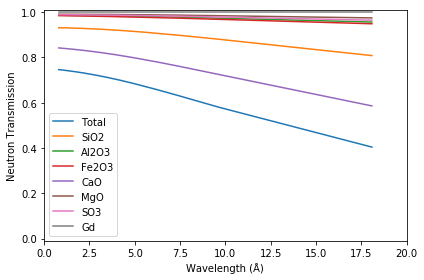

In [12]:
o_reso.plot(x_axis='lambda', y_axis='transmission', all_layers=True, lambda_max_angstroms=20)

In [13]:
# interpolate with the beam shape energy
energy = o_reso.total_signal['energy_eV']
trans = o_reso.total_signal['transmission']

y_function = interp1d(x=energy, y=trans, kind='cubic')
df['transmission'] = y_function(df['energy_eV'])
df['trans_flux'] = df['transmission'] * df['flux']
df

,wavelength_A,energy_eV,flux,transmission,trans_flux
0,0.812655,0.123843,1.776169e+04,0.746302,1.325558e+04
1,1.028404,0.077332,1.201199e+05,0.744319,8.940753e+04
2,1.244153,0.052837,2.919421e+05,0.742187,2.166755e+05
3,1.459902,0.038374,5.860009e+05,0.739915,4.335907e+05
4,1.675651,0.029128,1.030660e+06,0.737493,7.601044e+05
5,1.891400,0.022862,1.509066e+06,0.734939,1.109072e+06
6,2.107149,0.018420,1.863847e+06,0.732237,1.364779e+06
7,2.322899,0.015157,1.989239e+06,0.729388,1.450927e+06
8,2.538648,0.012691,2.231573e+06,0.726416,1.621050e+06
9,2.754397,0.010780,2.254231e+06,0.723303,1.630493e+06


In [15]:
total_trans = sum(df['trans_flux'])/sum(df['flux'])*100
print("Total neutron transmission (CG-1D): {} %".format(total_trans))

Total neutron transmission (CG-1D): 70.84057549588468 %


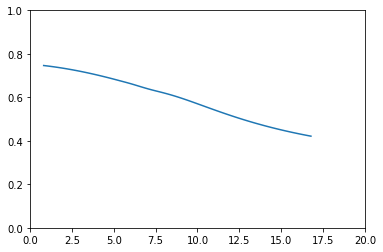

In [16]:
plt.plot(df['wavelength_A'], df['transmission'])
plt.ylim(top=1, bottom=0)
plt.xlim(left=0, right=20)
plt.show()